<a href="https://colab.research.google.com/github/Myavuzars/MachineLearning/blob/main/XgBoosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
import pandas as pd
import numpy as np
from numpy import mean

In [49]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [79]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning /pima_indians_diabetes.csv",header=None)
         

In [52]:
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [82]:
df.columns= ["Total pregnant",  "Glucose concentration", "Blood pressure", "Skin fold thickness", "Serum insulin", "Mass index" , "Diabetes", "Age", "Class"]

In [83]:
df.head()

,Total pregnant,Glucose concentration,Blood pressure,Skin fold thickness,Serum insulin,Mass index,Diabetes,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [55]:
df.shape

(768, 9)

In [56]:
df.dtypes

Total pregnant             int64
Glucose concentration      int64
Blood pressure             int64
Skin fold thickness        int64
Serum insulin              int64
Mass index               float64
Diabetes                 float64
Age                        int64
Class                      int64
dtype: object

In [57]:
# Partitioner
X = df.iloc[:,0:8]
y= df.iloc[:,8]

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y)

In [59]:
X_test.head()

,Total pregnant,Glucose concentration,Blood pressure,Skin fold thickness,Serum insulin,Mass index,Diabetes,Age
165,6,104,74,18,156,29.9,0.722,41
268,0,102,52,0,0,25.1,0.078,21
98,6,93,50,30,64,28.7,0.356,23
290,0,78,88,29,40,36.9,0.434,21
291,0,107,62,30,74,36.6,0.757,25


In [60]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

#Model
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

In [61]:
#Machine Learning Algorithms

In [62]:
#Dummy Classifieer
from sklearn.dummy import DummyClassifier
# define the reference model
model = DummyClassifier(strategy='most_frequent')

from numpy import mean
# Evaluate the model
scores_dummy = evaluate_model(X_train, y_train, model)
# summarize performance
print('Mean Accuracy: %.3f'  % (mean(scores_dummy)))

Mean Accuracy: 0.660


In [63]:
#Decision Tree(DTree) 
from sklearn import tree
model_DTree= tree.DecisionTreeClassifier()

# Evaluate the model
scores_Dtree = evaluate_model(X_train, y_train, model_DTree)
# summarize performance
print('Mean Accuracy: %.3f'  % (mean(scores_Dtree)))


Mean Accuracy: 0.726


In [64]:
#Support Vector Machine (SVM)
from sklearn import svm
from sklearn.svm import SVC
model_SVM= SVC(gamma='scale')

# Evaluate the model
scores_SVM = evaluate_model(X_train, y_train, model_SVM)
# summarize performance
print('Mean Accuracy: %.3f'  % (mean(scores_SVM)))


Mean Accuracy: 0.755


In [65]:
#Bagged Decision Trees (BAG)
from sklearn.ensemble import BaggingClassifier
model_BAG =BaggingClassifier(n_estimators=100)

# Evaluate the model
scores_BAG = evaluate_model(X_train, y_train, model_BAG)
# summarize performance
print('Mean Accuracy: %.3f'  % (mean(scores_BAG)))


Mean Accuracy: 0.771


In [66]:
#Random Forest (RF)
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier()

# Evaluate the model
scores_RF = evaluate_model(X_train, y_train, model_RF)
# summarize performance
print('Mean Accuracy: %.3f'  % (mean(scores_RF)))


Mean Accuracy: 0.774


In [67]:
#Gradient Boosting Machine (GBM)
from sklearn.ensemble import GradientBoostingClassifier
model_GBM =GradientBoostingClassifier(n_estimators=100)

# Evaluate the model
scores_GBM = evaluate_model(X_train, y_train, model_GBM)
# summarize performance
print('Mean Accuracy: %.3f'  % (mean(scores_GBM)))

Mean Accuracy: 0.755


In [68]:
#XG Boosting Machine (XGBM)
#Fit the model
from xgboost import XGBClassifier
model_XGBM =XGBClassifier()

# Evaluate the model
scores_XGBM = evaluate_model(X_train, y_train, model_XGBM)
# summarize performance
print('Mean Accuracy: %.3f'  % (mean(scores_XGBM)))

Mean Accuracy: 0.760


In [69]:
#Crete a data frame
df_scores = pd.DataFrame({'Model'   : ["Random Chance", "DecisonTree",  "SVM",  'Bagged DecisionTree', 'Random Forest','Gradient Boosting', 'XG Boosting'],
                          'Accuracy': [mean(scores_dummy),mean(scores_Dtree),mean(scores_SVM),mean(scores_BAG),mean(scores_RF),mean(scores_GBM),mean(scores_XGBM)]
                   })
print(df_scores)

                 Model  Accuracy
0        Random Chance  0.659770
1          DecisonTree  0.726144
2                  SVM  0.754688
3  Bagged DecisionTree  0.770811
4        Random Forest  0.773644
5    Gradient Boosting  0.754578
6          XG Boosting  0.760395


In [70]:
sorted_df = df_scores.sort_values(["Accuracy"], ascending=True)
sorted_df

,Model,Accuracy
0,Random Chance,0.659770
1,DecisonTree,0.726144
5,Gradient Boosting,0.754578
2,SVM,0.754688
6,XG Boosting,0.760395
3,Bagged DecisionTree,0.770811
4,Random Forest,0.773644


#Feature Enginnering

In [71]:
#Fit the model
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

In [72]:
#Feature importance
print(model.feature_importances_)

[0.08168437 0.26522693 0.06293285 0.08092844 0.08701191 0.17891032
 0.08427799 0.15902714]


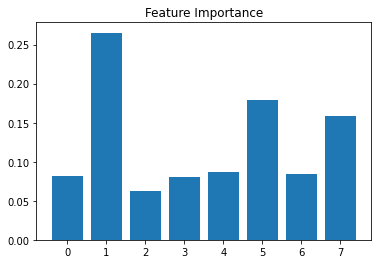

In [73]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.title("Feature Importance")
plt.show()

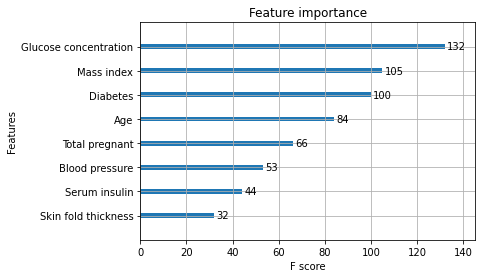

In [74]:
from xgboost import plot_importance
plot_importance(model)

In [87]:
df.iloc[:,1:9]

,Glucose concentration,Blood pressure,Skin fold thickness,Serum insulin,Mass index,Diabetes,Age,Class
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [98]:
# Dropping features
ndf =df.drop(["Blood pressure", "Skin fold thickness", "Serum insulin"], axis=1)

 

In [99]:
ndf.head()

,Total pregnant,Glucose concentration,Mass index,Diabetes,Age,Class
0,6,148,33.6,0.627,50,1
1,1,85,26.6,0.351,31,0
2,8,183,23.3,0.672,32,1
3,1,89,28.1,0.167,21,0
4,0,137,43.1,2.288,33,1


In [102]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

ndf.iloc[:,0:5] = scaler.fit_transform(ndf.iloc[:,0:5])
ndf.head()                      

,Total pregnant,Glucose concentration,Mass index,Diabetes,Age,Class
0,0.639947,0.848324,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,1.409746,5.484909,-0.020496,1


In [130]:
ndf.dtypes

Total pregnant           float64
Glucose concentration    float64
Mass index               float64
Diabetes                 float64
Age                      float64
Class                      int64
dtype: object

In [131]:
ndf["Class"] =ndf["Class"].astype("category")

In [142]:
ndf.shape

(768, 6)

In [136]:
new_X= ndf.iloc[:,1:5]
new_y= ndf.iloc[:,5]
new_X.head()

,Glucose concentration,Mass index,Diabetes,Age
0,0.848324,0.204013,0.468492,1.425995
1,-1.123396,-0.684422,-0.365061,-0.190672
2,1.943724,-1.103255,0.604397,-0.105584
3,-0.998208,-0.494043,-0.920763,-1.041549
4,0.504055,1.409746,5.484909,-0.020496


In [137]:
X_train, X_test, y_train, y_test = train_test_split(new_X,new_y)

In [108]:
#After feature Enginnering Machine Leraning Models


In [138]:
#Defining a function
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score



In [145]:
def eval_model(model):
  cv= RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
  scores= cross_val_score(model, X_train,y_train, scoring="accuracy", cv=cv)
  return scores

In [157]:
#Dummy Classifier
model_Dummy= DummyClassifier(strategy='most_frequent')
Dummy_score= round(mean(eval_model(model_Dummy)),3)
from numpy import mean
print(f'Dummy Score: {round(Dummy_score,3)}')


Dummy Score: 0.641


In [158]:
#SWM Classifier
SVM_Score =round(mean(eval_model(model_SVM)),3)
print(f'SVM_Score: {SVM_Score}')

SVM_Score: 0.78


In [159]:
# Bagging Classifier
BAG_Score= round(mean(eval_model(model_BAG)),3)
print(f'BAGGING_Score: {BAG_Score}')

BAGGING_Score: 0.757


In [160]:
#Random Forest Classifier
RF_Score= round(mean(eval_model(model_RF)),3)
print(f'Random Forest Score: {RF_Score}')

Random Forest Score: 0.758


In [161]:
#Gradient Boosting Classifier
GB_Score = round(mean(eval_model(model_GBM)),3)
print(f'Gradient Boosting Score: {GB_Score}')

Gradient Boosting Score: 0.762


In [162]:
#Extreme Gradient Boosting Classifier
XGB_Score = round(mean(eval_model(model_XGBM)),3)
print(f'Extreme Gradient B. Score: {XGB_Score}')

Extreme Gradient B. Score: 0.759


In [165]:
ndf_scores =pd.DataFrame({ "Models" : ["Dummy", "SVM", "Bagging", "Random Forest", "Gradient Boosting", "Extrem Gradient"],
                          "Scores" : [Dummy_score, SVM_Score, BAG_Score, RF_Score, GB_Score, XGB_Score] 
                          })

In [166]:
scores_sorted =ndf_scores.sort_values(['Scores'], ascending=True)
scores_sorted

,Models,Scores
0,Dummy,0.641
2,Bagging,0.757
3,Random Forest,0.758
5,Extrem Gradient,0.759
4,Gradient Boosting,0.762
1,SVM,0.780
